In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Utils and Library for notebook
from notebook_utils.OpenKbcMSToolkit import ExtractionToolkit as exttoolkit

DATA_PATH = '../data/'

df = pd.read_csv("resultFiles/featureExtraction_by_Jun/CD4.Ranksum.RFECV.gene.result", index_col=0)

meta_data = pd.read_csv(DATA_PATH+'annotation_metadata/EPIC_HCvB_metadata_baseline_updated-share.csv')
longDD_samples, shortDD_samples = exttoolkit.get_sample_name_by_contValues(meta_data, 'HCVB_ID', 'DiseaseDuration', 50)
longDD_samples = list(set(longDD_samples.values.tolist()).intersection(df.columns.tolist())) # intersected with act score matrix
shortDD_samples = list(set(shortDD_samples.values.tolist()).intersection(df.columns.tolist())) # intersected with act score matrix

# FC
df_fc = df[shortDD_samples].median(axis=1)-df[longDD_samples].median(axis=1)

# Centered
df = df.subtract(df.median(axis=1), axis=0)

df_fc = df_fc.sort_values(ascending=False)
print(df_fc)
high_expr_genes = df_fc.iloc[:20].index.tolist()

df_fc = df_fc.sort_values(ascending=True)
low_expr_genes = df_fc.iloc[:20].index.tolist()

105      0.969436
4747     0.338429
3486     0.296259
1823     0.281152
4000     0.280571
           ...   
83592   -0.222601
3899    -0.257637
1768    -0.268949
1380    -0.314801
80022   -0.332163
Length: 94, dtype: float64


/Users/junheeyun/OpenKBC/multiple_sclerosis_proj/notebook/notebook_utils/OpenKbcMSToolkit.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df[dataColname] = cont_df[dataColname].astype(float) # make float


In [72]:
lut = dict(zip(['short', 'long'], "rb"))
df[shortDD_samples+longDD_samples].loc[high_expr_genes]
cate_map = ['short']*len(shortDD_samples)+['long']*len(longDD_samples)
cate_map = [lut[x] for x in cate_map]

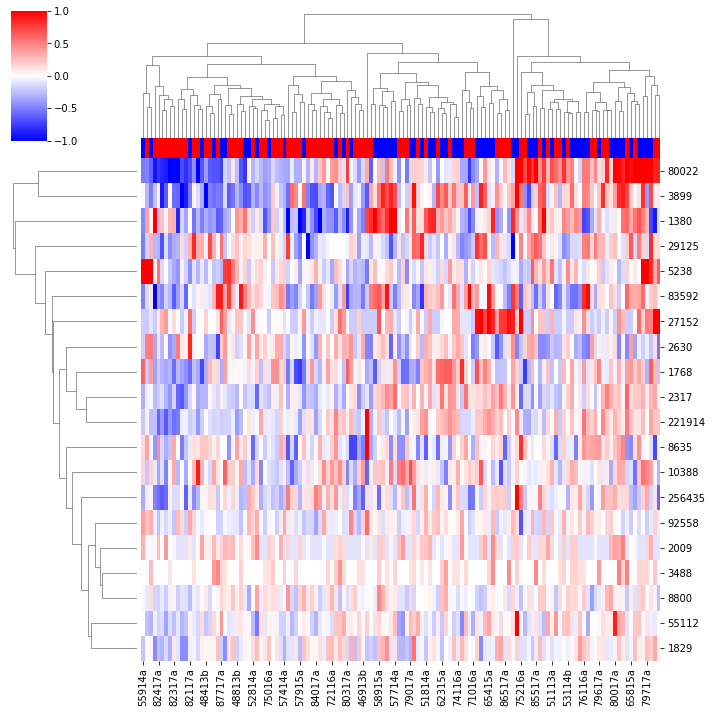

In [74]:
sns.clustermap(df[shortDD_samples+longDD_samples].loc[low_expr_genes], col_colors=cate_map, method='complete', metric='euclidean', cmap='bwr', vmin=-1, vmax=1)